# VISIONS-2 electron populations

### Load basic VISIONS-2 data

LOAD MAG: Currently low flyer only!
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD VLF: Currently low flyer only


/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_98765/3925829124.py:77: RuntimeWarning: invalid value encountered in double_scalars
  ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_98765/3925829124.py:77: RuntimeWarning: divide by zero encountered in double_scalars
  ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_98765/3925829124.py:81: RuntimeWarning: invalid value encountered in double_scalars
  ratioEDowngoing[i][j] = (elecDowngoing["flux"][i,j])/(elecPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_98765/3925829124.py:81: RuntimeWarning: divide by zero encountered in double_scalars
  ratioEDowngoing[i][j] = (elecDowngoing["flux"][i,j])/(elecPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_98765/3925829124.py:85: RuntimeWarning: invalid val

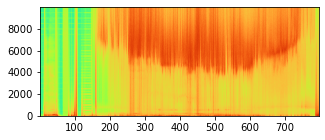

<IPython.core.display.Javascript object>

In [1]:
import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
import visions2_load_data
import v2  #plotting functions
import numpy as np 
import matplotlib.pyplot as plt

%load_ext nb_black
plt.rcParams['figure.figsize'] = [5, 2]


"""Enable auto module reloading"""
%load_ext autoreload
%autoreload 2

"""Load Langmuir Probe data"""
lp = visions2_load_data.load_langmuir()

"""Load magnetometer data"""
mag = visions2_load_data.load_mag()


"""Load E-field DC data (low-flyer only)"""
edc = visions2_load_data.load_efieldDC()

"""Load particle data"""
#All particle data
#elec = visions2_load_data.load_particle("eea")
#ions = visions2_load_data.load_particle("eia")

#Sum over pitch angles
elecAll = visions2_load_data.load_particle("eea",range=[-180,180],sumtype=1)
ionsAll = visions2_load_data.load_particle("eia",range=[-180,180],sumtype=1)
elecPerp = visions2_load_data.load_particle("eea",range=[70,110],sumtype=1)
ionsPerp = visions2_load_data.load_particle("eia",range=[70,110],sumtype=1)
elecDowngoing = visions2_load_data.load_particle("eea",range=[-20,20],sumtype=1)
ionsDowngoing = visions2_load_data.load_particle("eia",range=[-20,20],sumtype=1)
elecUpgoing = visions2_load_data.load_particle("eea",range=[147,180],sumtype=1)
ionsUpgoing = visions2_load_data.load_particle("eia",range=[147,180],sumtype=1)
#Sum over energies
elecLowE = visions2_load_data.load_particle("eea",range=[0,100],sumtype=2)
ionsLowE = visions2_load_data.load_particle("eia",range=[0,10],sumtype=2)
elecHigE = visions2_load_data.load_particle("eea",range=[200,200000],sumtype=2)
ionsHigE = visions2_load_data.load_particle("eia",range=[1000,30000],sumtype=2)



"""Load VLF data"""
vlfdata = visions2_load_data.load_vlf()
vlf12_lf = vlfdata["vlf12_lf"]

dvlf12_lf = vlf12_lf["dvlf12"]
times_vlf_lf = vlf12_lf["tvlf12"]

#sampling freq
sr_lf = [1/(times_vlf_lf[i+1]-times_vlf_lf[i]) for i in range(times_vlf_lf.size-1)]
fsVLF_lf = np.mean(sr_lf)
fsVLF = fsVLF_lf

"""Get spectral data - I only know how to do this by plotting, which is awkward"""
fig, axs = plt.subplots(1)
Sxx, specfreqs, spectimes, im = axs.specgram(dvlf12_lf, Fs=fsVLF, NFFT=512, scale='dB', cmap='turbo')
fcH_interp = np.interp(spectimes, mag["times"], mag["fcH"])
fcO_interp = np.interp(spectimes, mag["times"], mag["fcO"])


"""Create ratios of perp to parallel populations to see relative changes"""

ratioIDowngoing = [[0 for col in range(np.size(ionsPerp["energies"]))] for row in range(np.size(ionsPerp["times"]))]
ratioEDowngoing = [[0 for col in range(np.size(elecPerp["energies"]))] for row in range(np.size(elecPerp["times"]))]
ratioIUpgoing = [[0 for col in range(np.size(ionsPerp["energies"]))] for row in range(np.size(ionsPerp["times"]))]
ratioEUpgoing = [[0 for col in range(np.size(elecPerp["energies"]))] for row in range(np.size(elecPerp["times"]))]

for i in range(len(ionsPerp["times"])):
    for j in range(len(ionsPerp["energies"])):
        ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])

for i in range(len(elecPerp["times"])):
    for j in range(len(elecPerp["energies"])):
        ratioEDowngoing[i][j] = (elecDowngoing["flux"][i,j])/(elecPerp["flux"][i,j])

for i in range(len(ionsPerp["times"])):
    for j in range(len(ionsPerp["energies"])):
        ratioIUpgoing[i][j] = (ionsUpgoing["flux"][i,j])/(ionsPerp["flux"][i,j])

for i in range(len(elecPerp["times"])):
    for j in range(len(elecPerp["energies"])):
        ratioEUpgoing[i][j] = (elecUpgoing["flux"][i,j])/(elecPerp["flux"][i,j])

#### Create integrated line plots from spectra

In [2]:
plt.rcParams['figure.figsize'] = [15, 15]


smootime = 10. #smooth time in sec

vlfAmp_smoothed = v2.IntegrateSpectra(np.transpose(Sxx), spectimes, specfreqs, 3000, 10000, smootime)
eAmpPerp_smoothed = v2.IntegrateSpectra(elecPerp["flux"],elecPerp["times"],elecPerp["energies"],3,3000,smootime)
eAmpPar_smoothed = v2.IntegrateSpectra(elecDowngoing["flux"],elecDowngoing["times"],elecDowngoing["energies"],3,3000,smootime)
iAmpPerp_smoothed = v2.IntegrateSpectra(ionsPerp["flux"],ionsPerp["times"],ionsPerp["energies"],3,3000,smootime)
iAmpPar_smoothed = v2.IntegrateSpectra(ionsDowngoing["flux"],ionsDowngoing["times"],ionsDowngoing["energies"],3,3000,smootime)
eAmpLowE_smoothed = v2.IntegrateSpectra(elecLowE["flux"],elecLowE["times"],elecLowE["pitchangles"],-180,180,smootime)
eAmpHigE_smoothed = v2.IntegrateSpectra(elecHigE["flux"],elecHigE["times"],elecHigE["pitchangles"],-180,180,smootime)
iAmpLowE_smoothed = v2.IntegrateSpectra(ionsLowE["flux"],ionsLowE["times"],ionsLowE["pitchangles"],-180,180,smootime)
iAmpHigE_smoothed = v2.IntegrateSpectra(ionsHigE["flux"],ionsHigE["times"],ionsHigE["pitchangles"],-180,180,smootime)


<IPython.core.display.Javascript object>

### Photoelectrons

LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 


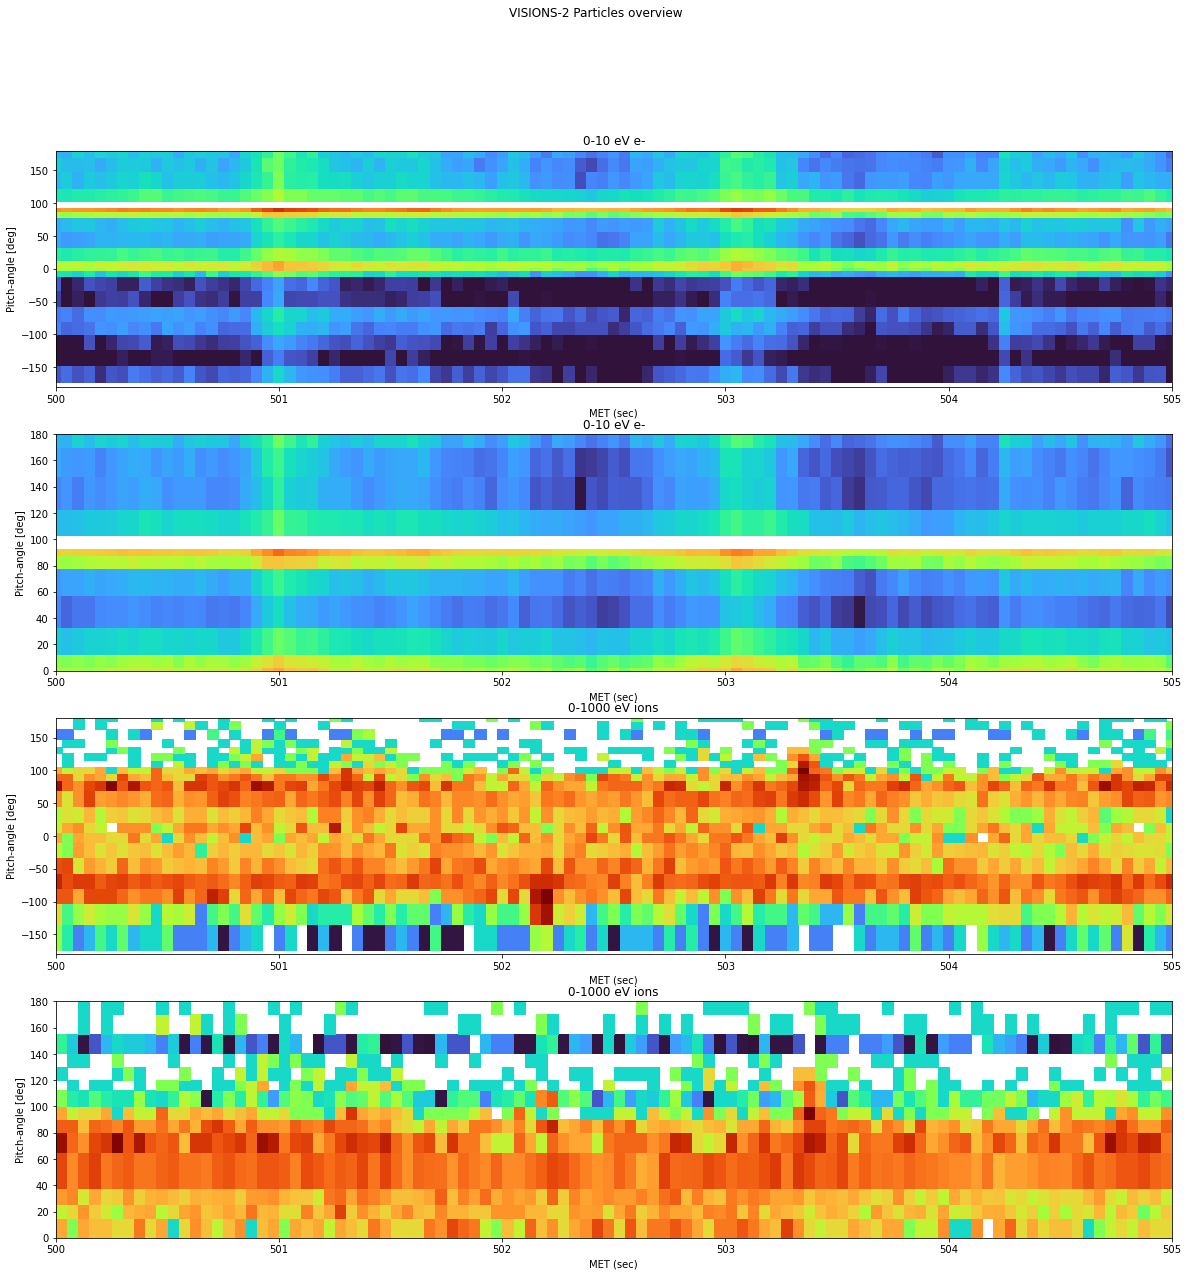

<IPython.core.display.Javascript object>

In [22]:

#What causes spinperiod increases in ion and e- flux? 

plt.rcParams['figure.figsize'] = [20, 20]

#Sum over energies while keeping pitch angles
elecLowE = visions2_load_data.load_particle("eea",range=[0,10],sumtype=2)
elecLowEf = visions2_load_data.load_particle("eea",range=[0,10],sumtype=2,FoldPitchangles=1)
elecMedE = visions2_load_data.load_particle("eea",range=[10,300],sumtype=2)
elecHigE = visions2_load_data.load_particle("eea",range=[800,8000],sumtype=2)


fig, axs = plt.subplots(4)
fig.suptitle('VISIONS-2 Particles overview')

kwargs = {"vmin":-50, "vmax":-10, "cmap":"turbo", "scale":"dB", "NFFT":512}

p=0
sort = np.argsort(elecLowE["pitchangles"])
PlotParams = {"title":"0-10 eV e-", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecLowE["times"],elecLowE["pitchangles"][sort],elecLowE["flux"][:,sort],p,axs,**PlotParams)
p=p+1
PlotParams = {"title":"0-10 eV e-", "yscale":"linear", "ylim":[0,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecLowEf["times"],elecLowEf["pitchangles"],elecLowEf["flux"],p,axs,**PlotParams)


"""
p=0
sort = np.argsort(elecLowE["pitchangles"])
PlotParams = {"title":"0-10 eV e-", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecLowE["times"],elecLowE["pitchangles"][sort],elecLowE["flux"][:,sort],p,axs,**PlotParams)
p=p+1
sort = np.argsort(elecMedE["pitchangles"])
PlotParams = {"title":"10-300 eV e-", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecMedE["times"],elecMedE["pitchangles"][sort],elecMedE["flux"][:,sort],p,axs,**PlotParams)
p=p+1
sort = np.argsort(elecHigE["pitchangles"])
PlotParams = {"title":"800-8000 eV e-", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecHigE["times"],elecHigE["pitchangles"][sort],elecHigE["flux"][:,sort],p,axs,**PlotParams)

"""


#[-160., -135., -110.,  -90.,  -70.,  -45.,  -20.,   -5.,    0.,
#          5.,   20.,   45.,   70.,   85.,   90.,   95.,  110.,  135.,
#        160.,  180.])

#for i in axs: i.set_xlim(0, 700)
for i in axs: i.set_xlim(480, 520)
for i in axs: i.set_xlim(500, 505)

LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 


/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/v2.py:17: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='gouraud',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])


[7.50666325e+09 6.85390992e+09 1.74937891e+09 4.37344728e+08
 6.59280859e+08 3.75333162e+09 8.12133930e+09 0.00000000e+00
 1.26307769e+09 4.27553429e+08 6.52753326e+08 1.06616377e+09]
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 


/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/v2.py:17: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='gouraud',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])


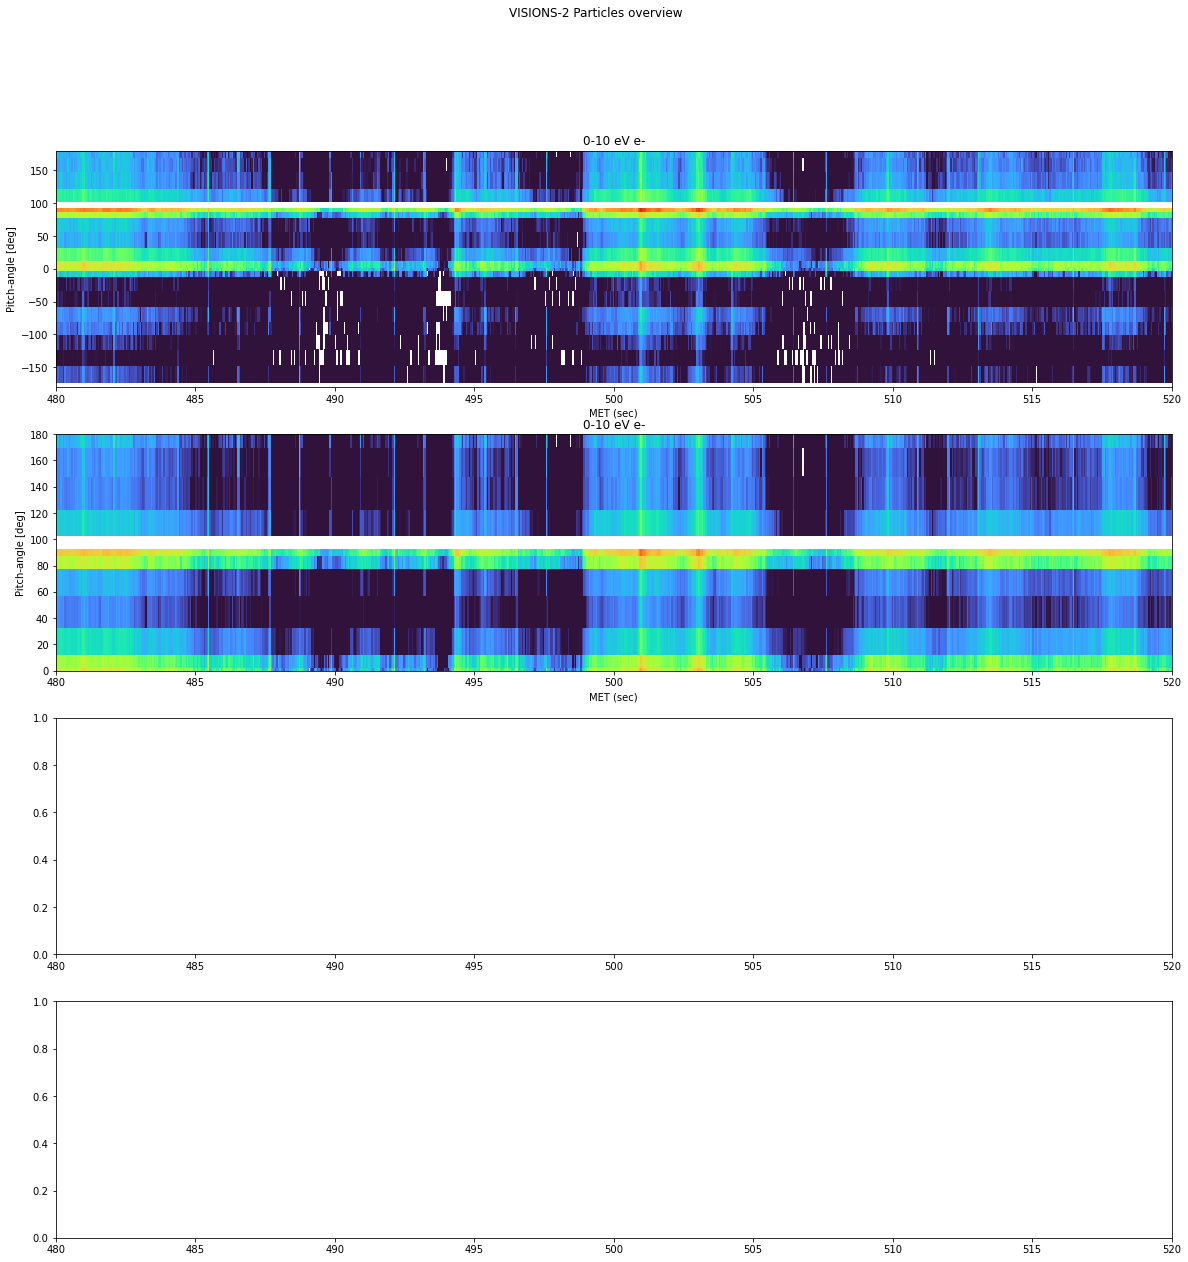

<IPython.core.display.Javascript object>

In [15]:

#What causes spinperiod increases in ion and e- flux? 

plt.rcParams['figure.figsize'] = [20, 20]

#Sum over energies while keeping pitch angles
elecLowE = visions2_load_data.load_particle("eea",range=[0,10],sumtype=2)
elecLowEf = visions2_load_data.load_particle("eea",range=[0,10],sumtype=2,folddata=1)
elecMedE = visions2_load_data.load_particle("eea",range=[10,300],sumtype=2)
elecHigE = visions2_load_data.load_particle("eea",range=[800,8000],sumtype=2)



fig, axs = plt.subplots(4)
fig.suptitle('VISIONS-2 Particles overview')

kwargs = {"vmin":-50, "vmax":-10, "cmap":"turbo", "scale":"dB", "NFFT":512}

p=0
sort = np.argsort(elecLowE["pitchangles"])
PlotParams = {"title":"0-10 eV e-", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecLowE["times"],elecLowE["pitchangles"][sort],elecLowE["flux"][:,sort],p,axs,**PlotParams)
p=p+1
sort = np.argsort(elecLowEf["pitchangles"])
PlotParams = {"title":"0-10 eV e-", "yscale":"linear", "ylim":[0,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecLowEf["times"],elecLowEf["pitchangles"],elecLowEf["flux"],p,axs,**PlotParams)


print(elecLowEf["flux"][100,10,6])

"""
p=0
sort = np.argsort(elecLowE["pitchangles"])
PlotParams = {"title":"0-10 eV e-", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecLowE["times"],elecLowE["pitchangles"][sort],elecLowE["flux"][:,sort],p,axs,**PlotParams)
p=p+1
sort = np.argsort(elecMedE["pitchangles"])
PlotParams = {"title":"10-300 eV e-", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecMedE["times"],elecMedE["pitchangles"][sort],elecMedE["flux"][:,sort],p,axs,**PlotParams)
p=p+1
sort = np.argsort(elecHigE["pitchangles"])
PlotParams = {"title":"800-8000 eV e-", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecHigE["times"],elecHigE["pitchangles"][sort],elecHigE["flux"][:,sort],p,axs,**PlotParams)

"""


#[-160., -135., -110.,  -90.,  -70.,  -45.,  -20.,   -5.,    0.,
#          5.,   20.,   45.,   70.,   85.,   90.,   95.,  110.,  135.,
#        160.,  180.])

#for i in axs: i.set_xlim(0, 700)
for i in axs: i.set_xlim(480, 520)
#for i in axs: i.set_xlim(500, 505)